<a href="https://colab.research.google.com/github/RahulSinghWaldia/GLOBAL-TERRORISM-ANALYSIS/blob/main/Copy_of_Global_Terrorism_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.</b>

# <b> Explore and analyze the data to discover key findings pertaining to terrorist activities. </b>

In [1]:
#import libraries
import numpy as np                                                    #for fast operations on array
import pandas as pd                                                   #for read and manipulate dataset
import matplotlib.pyplot as plt                                       #for data visualization 
import seaborn as sns                                                 #for data visualization 
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
#load dataset
dataset = pd.read_csv(r'/content/sample_data/Global Terrorism Data.csv',encoding='ISO-8859-1')
df = dataset.copy()
df.head


<bound method NDFrame.head of            eventid  iyear  imonth  iday approxdate  extended resolution  \
0     197000000001   1970       7     2        NaN       0.0        NaN   
1     197000000002   1970       0     0        NaN       0.0        NaN   
2     197001000001   1970       1     0        NaN       0.0        NaN   
3     197001000002   1970       1     0        NaN       0.0        NaN   
4     197001000003   1970       1     0        NaN       0.0        NaN   
...            ...    ...     ...   ...        ...       ...        ...   
9651  197911130005   1979      11    13        NaN       0.0        NaN   
9652  197911130006   1979      11    13        NaN       0.0        NaN   
9653  197911130007   1979      11    13        NaN       0.0        NaN   
9654  197911130008   1979      11    13        NaN       0.0        NaN   
9655  197911140001   1979      11    14        NaN       NaN        NaN   

      country         country_txt  region  ... addnotes scite1 scite2

In [3]:
#select the important columns and rename them
df = df[['iyear','imonth','iday','extended','country_txt','region_txt','city','success','suicide','attacktype1_txt','targtype1_txt','gname','weaptype1_txt','nkill']]
df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','extended':'Extended','country_txt':'Country','region_txt':'Region','city':'City','success':'Success','suicide':'Suicide','attacktype1_txt':'Attack_Type','targtype1_txt':'TArget_Type','gname':'Attack_Group','weaptype1_txt':'Weapon','nkill':'Number_of_Killed'},inplace=True)
df.head()

,Year,Month,Day,Extended,Country,Region,City,Success,Suicide,Attack_Type,TArget_Type,Attack_Group,Weapon,Number_of_Killed
0,1970,7,2,0.0,Dominican Republic,Central America & Caribbean,Santo Domingo,1.0,0.0,Assassination,Private Citizens & Property,MANO-D,Unknown,1.0
1,1970,0,0,0.0,Mexico,North America,Mexico city,1.0,0.0,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,Unknown,0.0
2,1970,1,0,0.0,Philippines,Southeast Asia,Unknown,1.0,0.0,Assassination,Journalists & Media,Unknown,Unknown,1.0
3,1970,1,0,0.0,Greece,Western Europe,Athens,1.0,0.0,Bombing/Explosion,Government (Diplomatic),Unknown,Explosives,NaN
4,1970,1,0,0.0,Japan,East Asia,Fukouka,1.0,0.0,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,Incendiary,NaN


Year -> This field contains the year in which the incident occurred.

Month -> This field contains the number of the month in which the incident occurred.

Day -> This field contains the numeric day of the month on which the incident occurred.

Extended -> 1 = "Yes" The duration of an incident extended more than 24 hours. 0 = "No" The duration of an incident extended less

Country -> This field identifies the country or location where the incident occurred.

Region -> This field identifies the region in which the incident occurred.

City -> Name of the city, village, or town in which the incident occurred

Success -> Success of a terrorist strike

Suicide -> 1 = "Yes" The incident was a suicide attack. 0 = "No" There is no indication that the incident was a suicide

Attack_Type -> The general method of attack and broad class of tactics used.

Target_Type -> The general type of target/victim

Target_Sub_Type -> The more specific target category

Attack_Group -> The name of the group that carried out the attack

Weapon -> General type of weapon used in the incident

Number_of_Killed -> The number of total confirmed fatalities for the incident

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9656 entries, 0 to 9655
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Year              9656 non-null   int64  
 1   Month             9656 non-null   int64  
 2   Day               9656 non-null   int64  
 3   Extended          9655 non-null   float64
 4   Country           9655 non-null   object 
 5   Region            9655 non-null   object 
 6   City              9655 non-null   object 
 7   Success           9655 non-null   float64
 8   Suicide           9655 non-null   float64
 9   Attack_Type       9655 non-null   object 
 10  TArget_Type       9655 non-null   object 
 11  Attack_Group      9655 non-null   object 
 12  Weapon            9655 non-null   object 
 13  Number_of_Killed  8497 non-null   float64
dtypes: float64(4), int64(3), object(7)
memory usage: 1.0+ MB


In [5]:
df.describe()

,Year,Month,Day,Extended,Success,Suicide,Number_of_Killed
count,9656.000000,9656.000000,9656.000000,9655.000000,9655.000000,9655.0,8497.000000
mean,1975.971935,6.282001,15.164561,0.026308,0.905438,0.0,0.815464
std,2.890571,3.368098,9.022129,0.160057,0.292625,0.0,5.748584
min,1970.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,1974.000000,3.000000,7.000000,0.000000,1.000000,0.0,0.000000
50%,1977.000000,6.000000,15.000000,0.000000,1.000000,0.0,0.000000
75%,1978.000000,9.000000,23.000000,0.000000,1.000000,0.0,1.000000
max,1979.000000,12.000000,31.000000,1.000000,1.000000,0.0,422.000000


In [6]:
print("Number of Rows : {}" .format(df.shape[0]))

Number of Rows : 9656


In [7]:
#check missing values
def check_missing(data) :
  total = data.isnull().sum().sort_values(ascending=False)
  percent = (data.isnull().sum()/data.isnull.count()).sort_values(ascending=False)
  missing_data=pd.concat([total,percent],axis=1,keys=['Total','Percent'])
  return missing_data.head(20)
  check_missing(df)

In [8]:
df["City"].fillna("Unknown",inplace=True)
df["Number_of_Killed"].fillna(0,inplace=True)

In [9]:
#check duplicate rows
def check_duplicate(data):
  duplicate=data.duplicated()
  unique_data=pd.Series(data.shape[0] - duplicate.value_counts()[1])
  duplicate_data=pd.Series(data.shape[0] - duplicate.value_counts()[0])
  unique_data_percent=pd.Series((unique_data/data.shape[0])*100)
  duplicate_data_percent=pd.Series((duplicate_data/data.shape[0])*100)
  dub = pd.concat([unique_data,duplicate_data,unique_data_percent,duplicate_data_percent],axis=1,keys=['Unique Count','Duplicate Count','Unique Percent','Duplicate Percent'])
  return dub
  check_duplicate(df)


In [10]:
#drop duplicate
df.drop_duplicates(inplace=True)

Text(0.5, 1.0, 'Number Of Terrorist Activities Each Year')

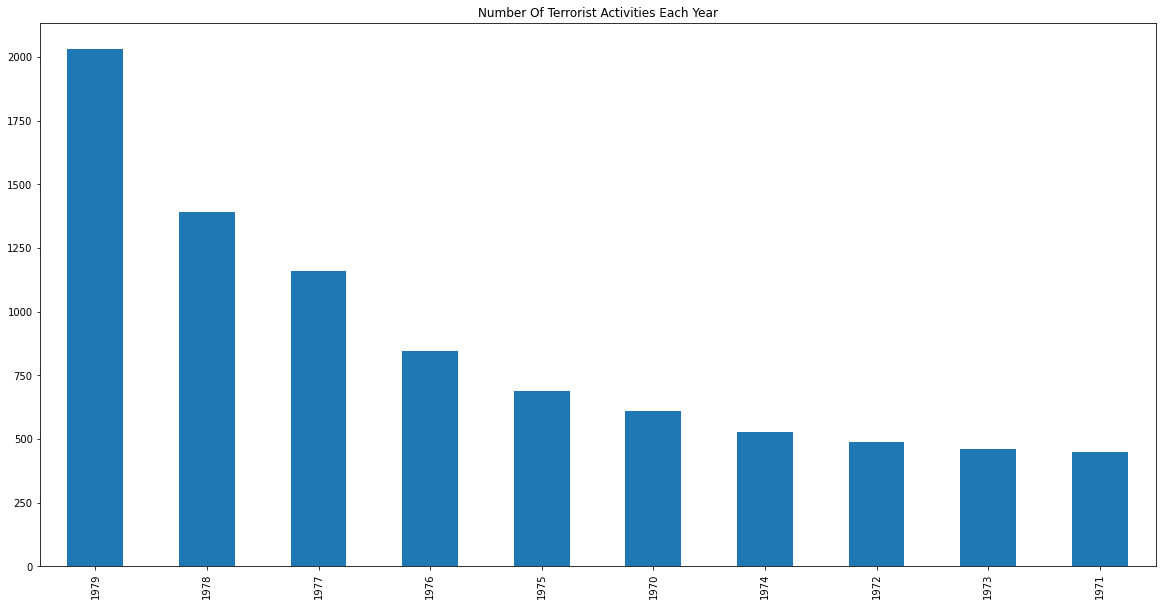

In [11]:
df['Year'].value_counts().plot(kind='bar',figsize=[20,10])
plt.title('Number Of Terrorist Activities Each Year')

Text(0.5, 1.0, 'Number Of Terrorist Activities in Top 10 Cities')

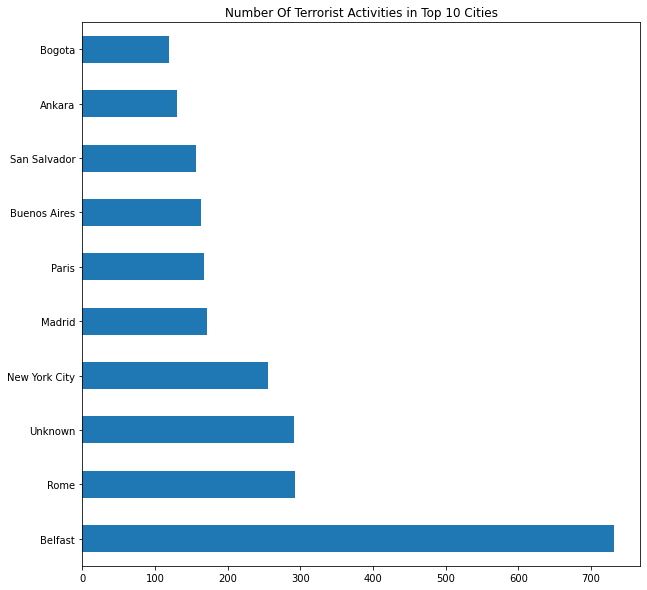

In [12]:
df['City'].value_counts().head(10).plot(kind='barh',figsize=[10,10])
plt.title('Number Of Terrorist Activities in Top 10 Cities')

Text(0.5, 1.0, 'Number Of Terrorist Activities in Top 10 Countries')

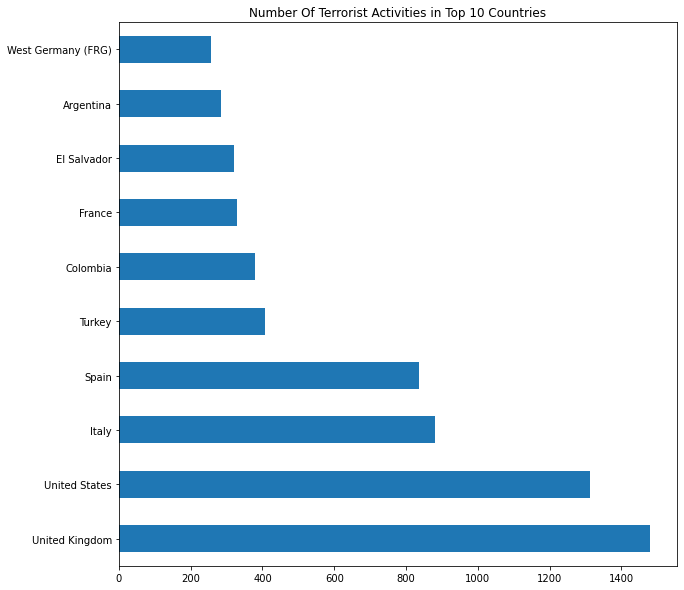

In [13]:
df['Country'].value_counts().head(10).plot(kind='barh',figsize=[10,10])
plt.title('Number Of Terrorist Activities in Top 10 Countries')

Text(0.5, 1.0, 'Number Of Terrorist Activities in Region')

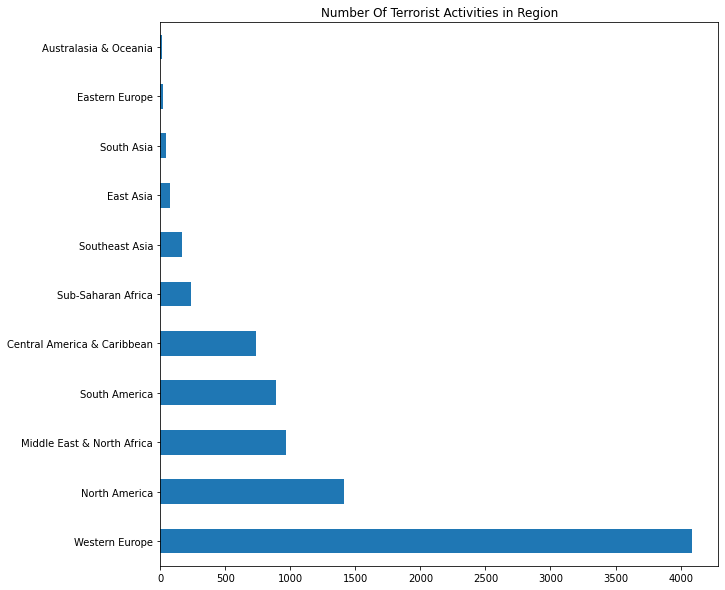

In [14]:
df['Region'].value_counts().plot(kind='barh',figsize=[10,10])
plt.title('Number Of Terrorist Activities in Region')


Text(0.5, 1.0, 'Favorite Attack Methods')

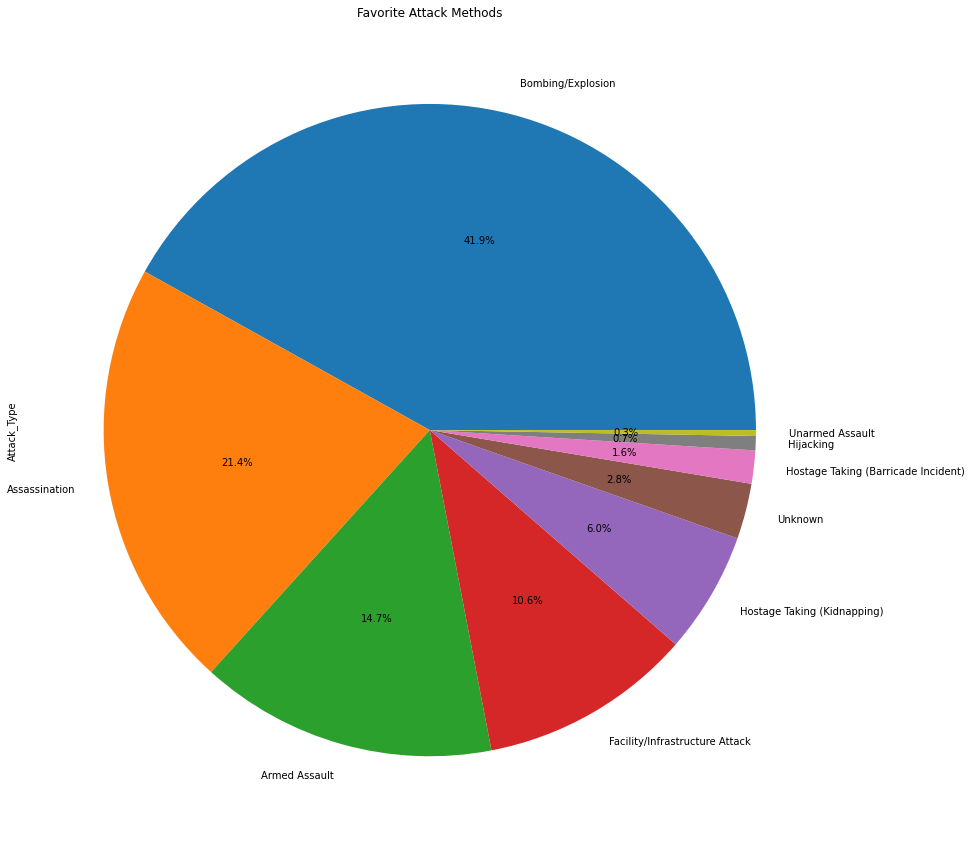

In [15]:
df['Attack_Type'].value_counts().plot(kind='pie',figsize=[20,15],autopct='%1.1f%%')
plt.title("Favorite Attack Methods")


Text(0.5, 1.0, 'Favorite Targets')

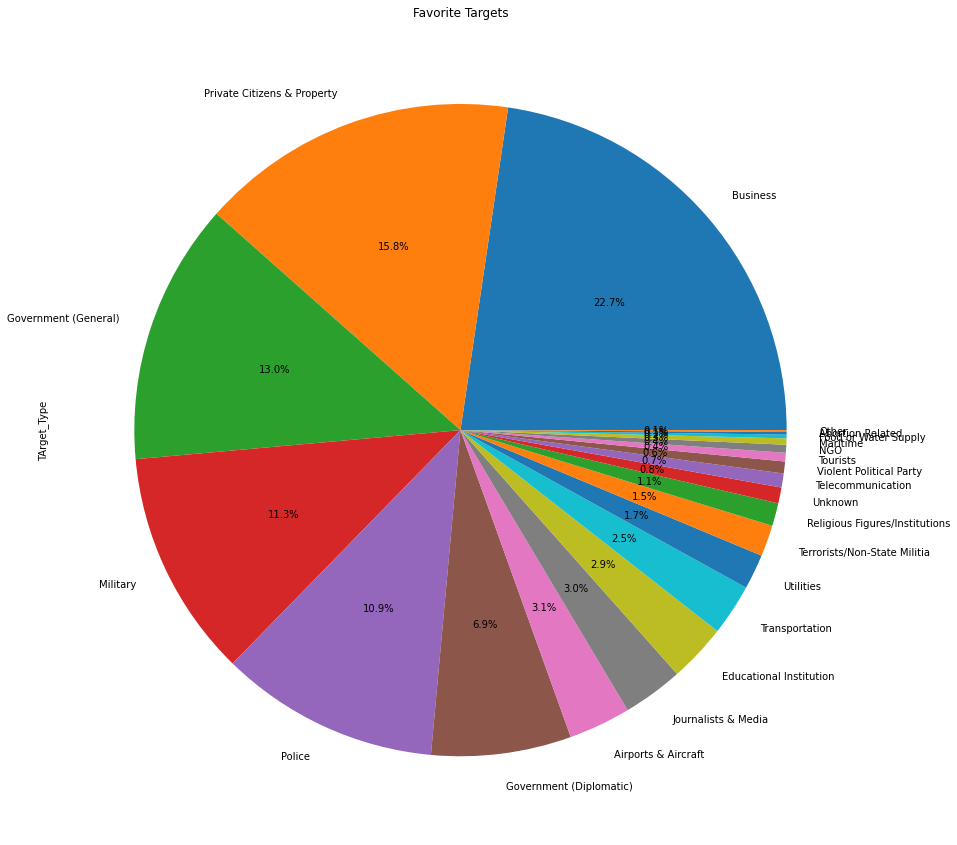

In [17]:
df['TArget_Type'].value_counts().plot(kind='pie',figsize=[20,15],autopct='%1.1f%%')
plt.title('Favorite Targets')

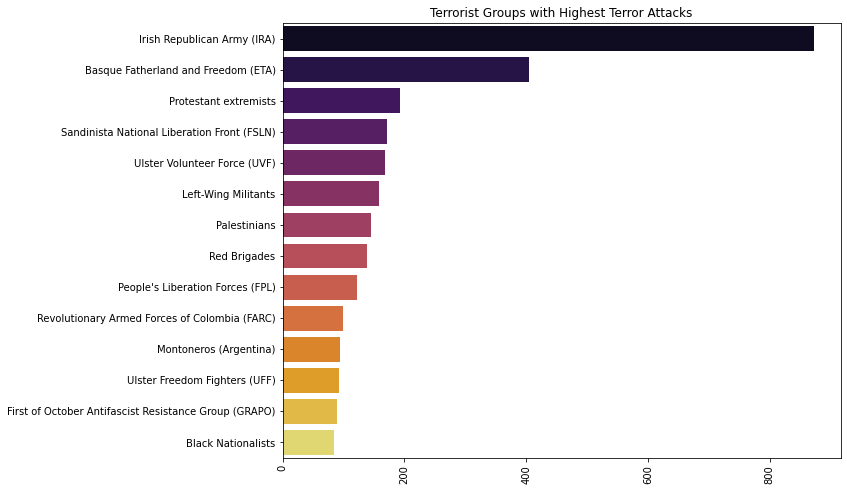

In [18]:
sns.barplot(df['Attack_Group'].value_counts()[1:15].values,df['Attack_Group'].value_counts()[1:15].index,palette=('inferno'))
plt.xticks(rotation=90)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.title('Terrorist Groups with Highest Terror Attacks')
plt.show()

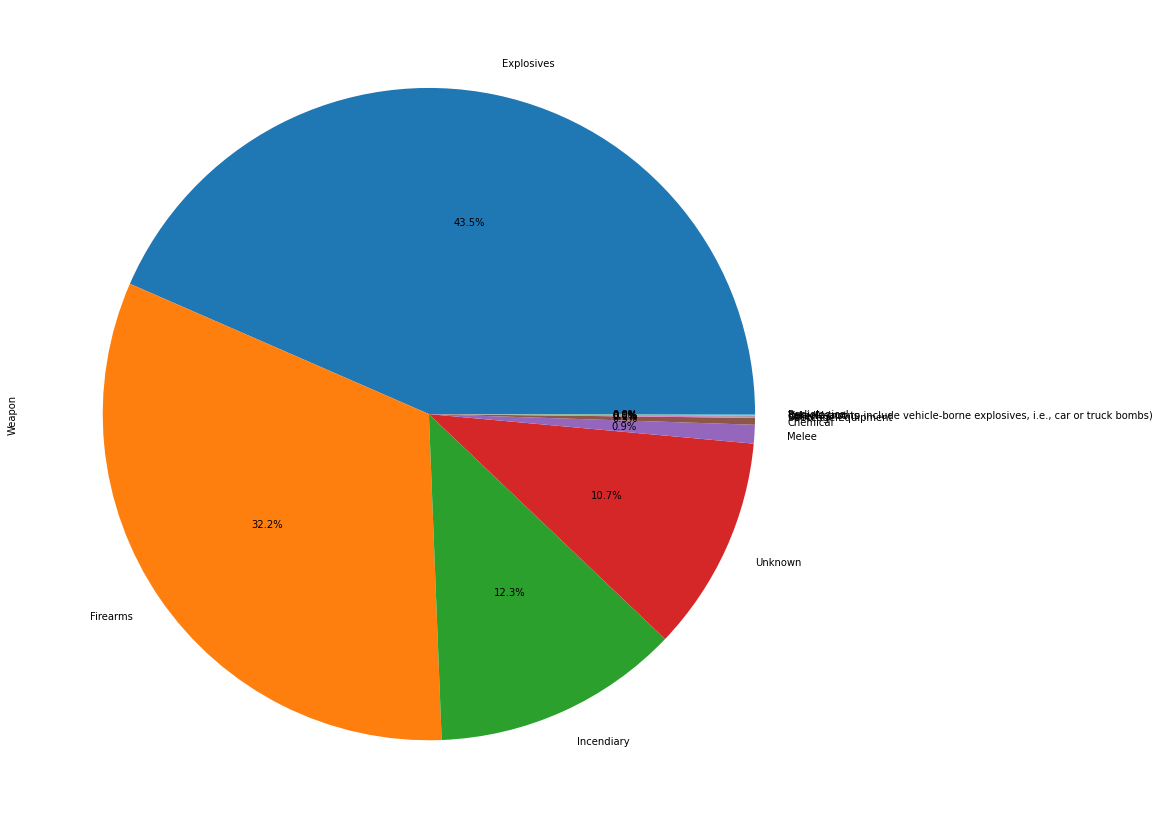

In [19]:
df['Weapon'].value_counts().plot(kind='pie',figsize=[20,15],autopct='%1.1f%%')

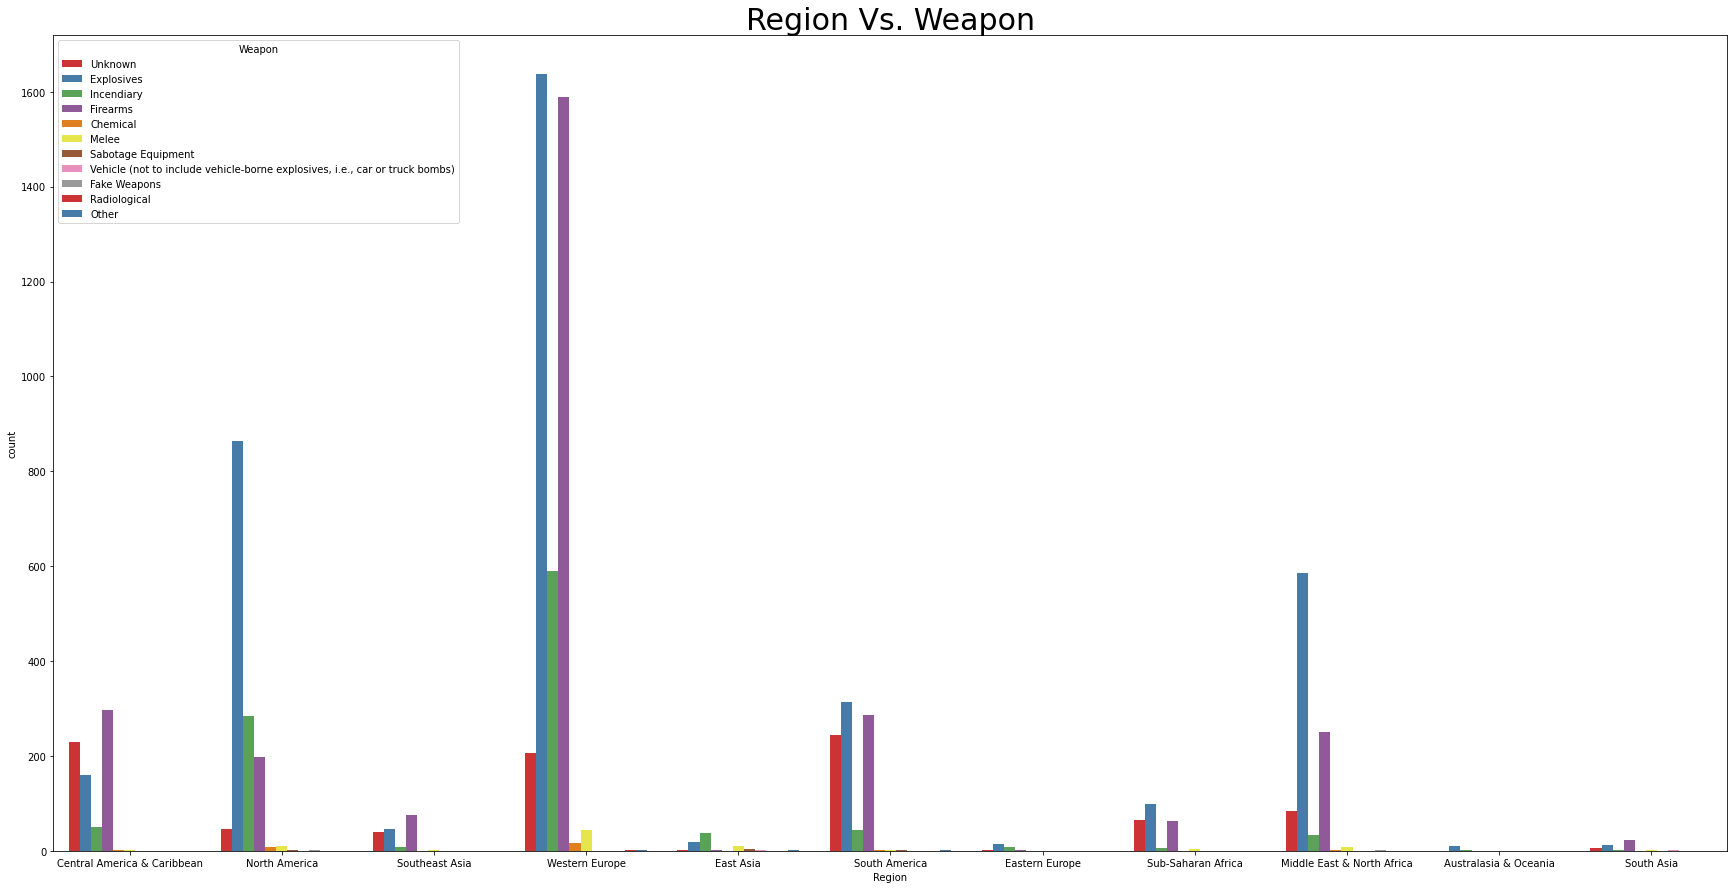

In [20]:
plt.subplots(figsize = (30,15))
sns.countplot(x="Region", hue ='Weapon', data = df,palette = "Set1")
plt.title('Region Vs. Weapon', fontsize = 30)
plt.show()


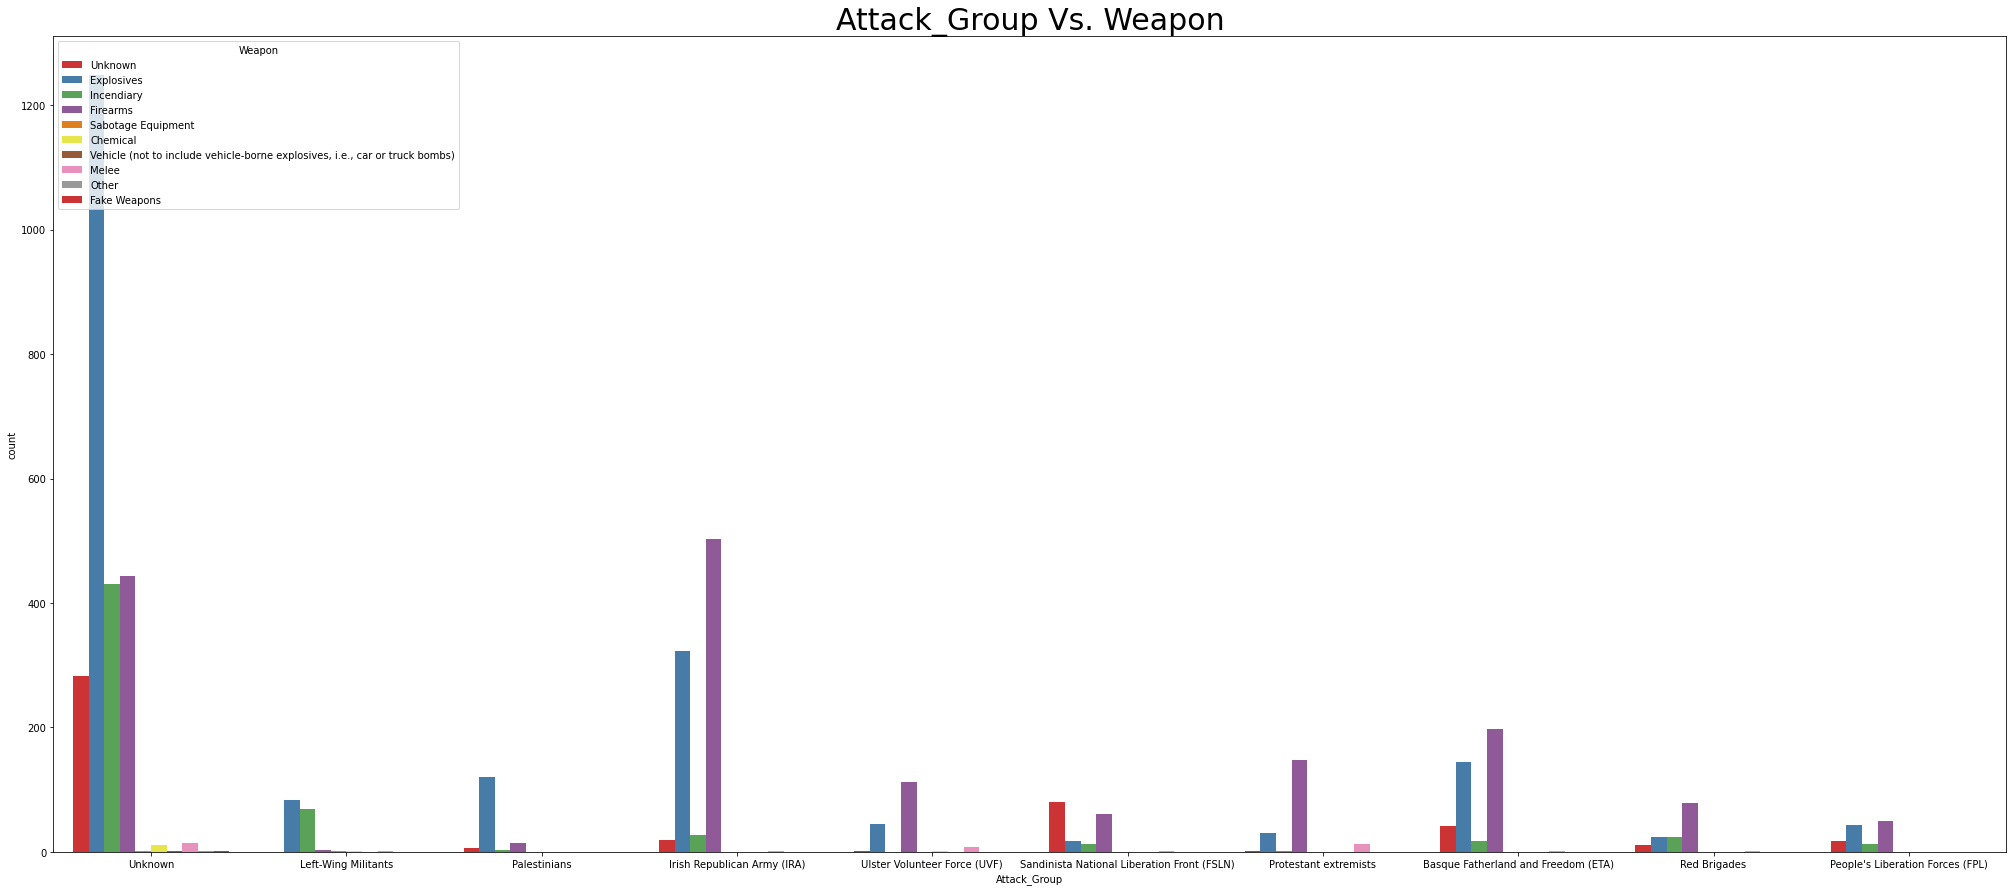

In [21]:
plt.subplots(figsize = (35,15))
Top_10_Group = df['Attack_Group'].value_counts().index.tolist()[0:10]
snap = df[['Attack_Group','Weapon']]
AttackG_Weapon = snap[snap['Attack_Group'].isin(Top_10_Group)]
sns.countplot(x='Attack_Group', hue ='Weapon', data = AttackG_Weapon,palette = "Set1")
plt.title('Attack_Group Vs. Weapon', fontsize = 30)
plt.show()


1.0    7816
0.0     836
Name: Success, dtype: int64


Text(0.5, 1.0, 'Success terrorist operations')

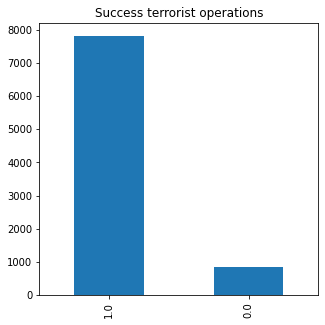

In [22]:
df['Success'].value_counts().plot(kind='bar',figsize=[5,5])
print(df['Success'].value_counts())
plt.title("Success terrorist operations")


0.0    8652
Name: Suicide, dtype: int64


Text(0.5, 1.0, 'Suicide terrorist operations')

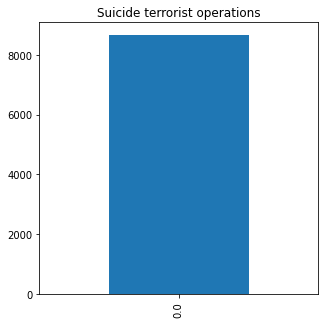

In [23]:
df['Suicide'].value_counts().plot(kind='bar',figsize=[5,5])
print(df['Suicide'].value_counts())
plt.title("Suicide terrorist operations")


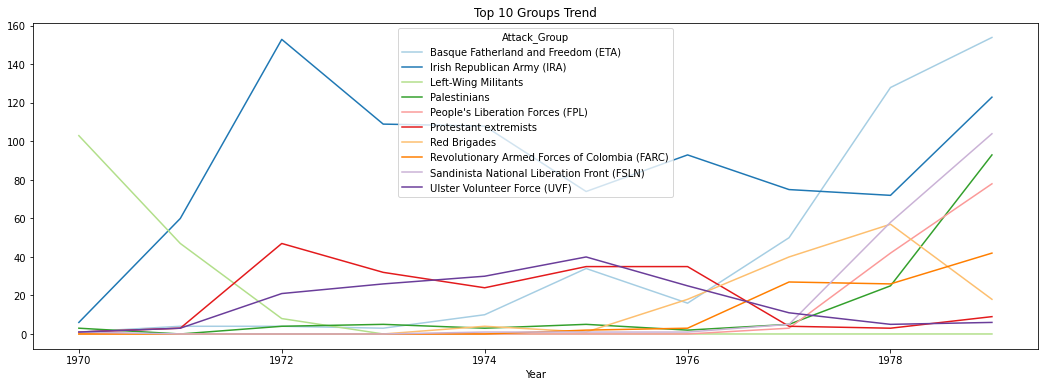

In [24]:
top_groups10=df[df['Attack_Group'].isin(df['Attack_Group'].value_counts()[1:11].index)]
pd.crosstab(top_groups10.Year,top_groups10.Attack_Group).plot(color=sns.color_palette('Paired',15))
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.title("Top 10 Groups Trend")
plt.show()
